In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low = -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | alvdal
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | tarudant
City not found. Skipping...
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | chara
Processing Record 20 of Set 1 | ribeira grande
Processing Rec

Processing Record 35 of Set 4 | vestmannaeyjar
Processing Record 36 of Set 4 | kavieng
Processing Record 37 of Set 4 | provideniya
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | piterka
Processing Record 40 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 41 of Set 4 | shenzhen
Processing Record 42 of Set 4 | oparino
Processing Record 43 of Set 4 | lithgow
Processing Record 44 of Set 4 | porto calvo
Processing Record 45 of Set 4 | sassandra
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | machali
Processing Record 49 of Set 4 | puteyets
Processing Record 50 of Set 4 | muscat
Processing Record 1 of Set 5 | sibolga
Processing Record 2 of Set 5 | indramayu
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | kanel
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | tomigusuku
Processing Record 7 of Set 5 | hobyo
Proces

Processing Record 29 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 30 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 31 of Set 8 | otane
Processing Record 32 of Set 8 | jeremie
Processing Record 33 of Set 8 | kaeo
Processing Record 34 of Set 8 | estacion coahuila
Processing Record 35 of Set 8 | bubaque
Processing Record 36 of Set 8 | paita
Processing Record 37 of Set 8 | port elizabeth
Processing Record 38 of Set 8 | arkhipo-osipovka
Processing Record 39 of Set 8 | cayenne
Processing Record 40 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 41 of Set 8 | severo-kurilsk
Processing Record 42 of Set 8 | makakilo city
Processing Record 43 of Set 8 | pringsewu
Processing Record 44 of Set 8 | stolac
Processing Record 45 of Set 8 | cienaga de oro
Processing Record 46 of Set 8 | holme
Processing Record 47 of Set 8 | ndiekro
City not found. Skipping...
Processing Record 48 of Set 8 | lamar
Processing Record 49 of Set 8 | okha
Process

Processing Record 13 of Set 12 | kamenka
Processing Record 14 of Set 12 | comodoro rivadavia
Processing Record 15 of Set 12 | netivot
Processing Record 16 of Set 12 | new lenox
Processing Record 17 of Set 12 | ugoofaaru
Processing Record 18 of Set 12 | naron
Processing Record 19 of Set 12 | tahta
Processing Record 20 of Set 12 | gao
Processing Record 21 of Set 12 | soldotna
Processing Record 22 of Set 12 | milos
Processing Record 23 of Set 12 | balaipungut
Processing Record 24 of Set 12 | awjilah
Processing Record 25 of Set 12 | hofn
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | hunza
City not found. Skipping...
Processing Record 29 of Set 12 | ust-kut
Processing Record 30 of Set 12 | livingston
Processing Record 31 of Set 12 | rocha
Processing Record 32 of Set 12 | san andres
Processing Record 33 of Set 12 | malibu
Processing Record 34 of Set 12 | merauke
Processing Record 35 of Set 12 | uwayl
City not found. Skipping...


In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,46.00,87,1,3.44,US,2021-01-16 15:16:17
1,Rikitea,-23.1203,-134.9692,77.45,71,25,0.98,PF,2021-01-16 15:15:12
2,Saint George,37.1041,-113.5841,33.80,40,1,4.61,US,2021-01-16 15:15:42
3,Cape Town,-33.9258,18.4232,77.00,50,40,13.80,ZA,2021-01-16 15:16:39
4,Port Alfred,-33.5906,26.8910,71.01,78,0,10.00,ZA,2021-01-16 15:17:11
5,Souillac,-20.5167,57.5167,82.40,78,40,8.05,MU,2021-01-16 15:17:46
6,Atuona,-9.8000,-139.0333,77.45,77,1,13.27,PF,2021-01-16 15:15:12
7,Lebu,-37.6167,-73.6500,60.40,61,0,19.13,CL,2021-01-16 15:15:19
8,Busselton,-33.6500,115.3333,64.99,61,0,7.00,AU,2021-01-16 15:17:46
9,Saskylakh,71.9167,114.0833,-9.83,89,100,8.48,RU,2021-01-16 15:17:47


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2021-01-16 15:16:17,38.4210,-121.4238,46.00,87,1,3.44
1,Rikitea,PF,2021-01-16 15:15:12,-23.1203,-134.9692,77.45,71,25,0.98
2,Saint George,US,2021-01-16 15:15:42,37.1041,-113.5841,33.80,40,1,4.61
3,Cape Town,ZA,2021-01-16 15:16:39,-33.9258,18.4232,77.00,50,40,13.80
4,Port Alfred,ZA,2021-01-16 15:17:11,-33.5906,26.8910,71.01,78,0,10.00
...,...,...,...,...,...,...,...,...,...
542,Rio Cuarto,AR,2021-01-16 15:18:55,-33.1307,-64.3499,64.40,72,75,20.71
543,Turukhansk,RU,2021-01-16 15:18:56,65.8167,87.9833,-23.04,84,100,12.80
544,Bandarbeyla,SO,2021-01-16 15:18:57,9.4942,50.8122,75.54,72,20,13.76
545,Khuzdar,PK,2021-01-16 15:18:58,27.7384,66.6434,57.54,30,0,2.64


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

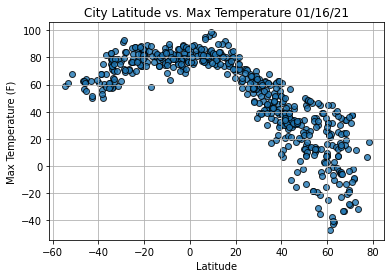

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

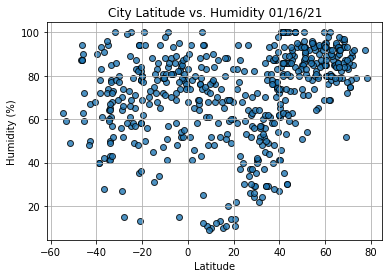

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

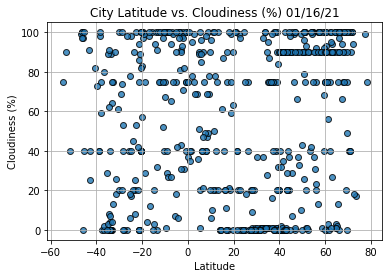

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

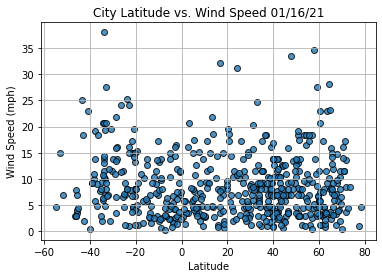

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Adrar
Country                        MR
Date          2021-01-16 15:17:47
Lat                       20.5022
Lng                      -10.0711
Max Temp                    71.76
Humidity                       14
Cloudiness                    100
Wind Speed                  19.48
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
542    False
543     True
544     True
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2021-01-16 15:16:17,38.4210,-121.4238,46.00,87,1,3.44
2,Saint George,US,2021-01-16 15:15:42,37.1041,-113.5841,33.80,40,1,4.61
9,Saskylakh,RU,2021-01-16 15:17:47,71.9167,114.0833,-9.83,89,100,8.48
10,Korla,CN,2021-01-16 15:17:47,41.7597,86.1469,20.68,81,0,7.67
11,Alvdal,NO,2021-01-16 15:17:47,62.1077,10.6307,15.80,92,90,4.61


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

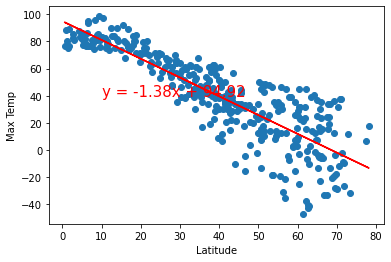

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

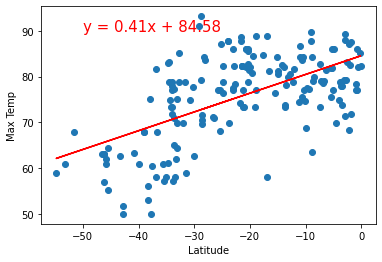

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

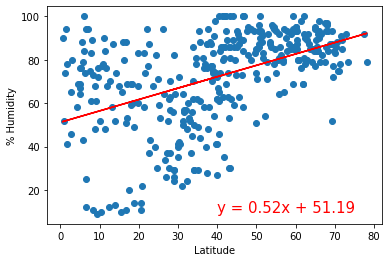

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

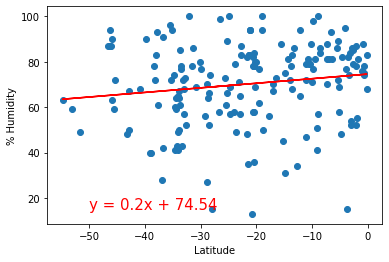

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

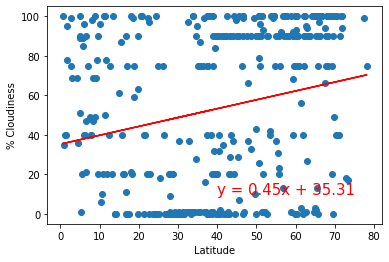

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

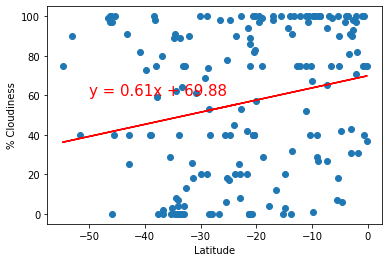

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

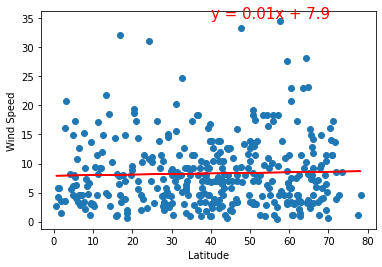

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

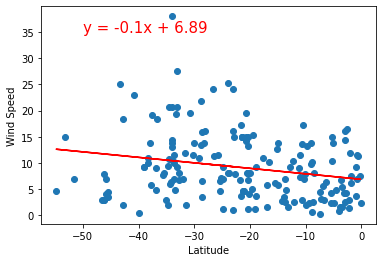

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))